# Pre - Processing

## Importing All Packages

In [56]:
import numpy as np
import pandas as pd

import os
print(os.listdir('./input'))

import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

from sklearn.impute import SimpleImputer # used for handling missing data

from sklearn.preprocessing import LabelEncoder #for encoding

from sklearn.model_selection import train_test_split #for splitting training and testing

from sklearn.utils import resample #resampling the dataset

from imblearn.over_sampling import SMOTE #for resampling SMOTE

from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB 


['online_shoppers_intention.csv']


## Reading Data

In [57]:
data = pd.read_csv('./input/online_shoppers_intention.csv')

# checking the shape of the data
print(data.shape)
data2=data.copy()
data_to_be_imputed = data.copy()

(12330, 18)


In [58]:
data.head()
data.Revenue.value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [59]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [60]:
data.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

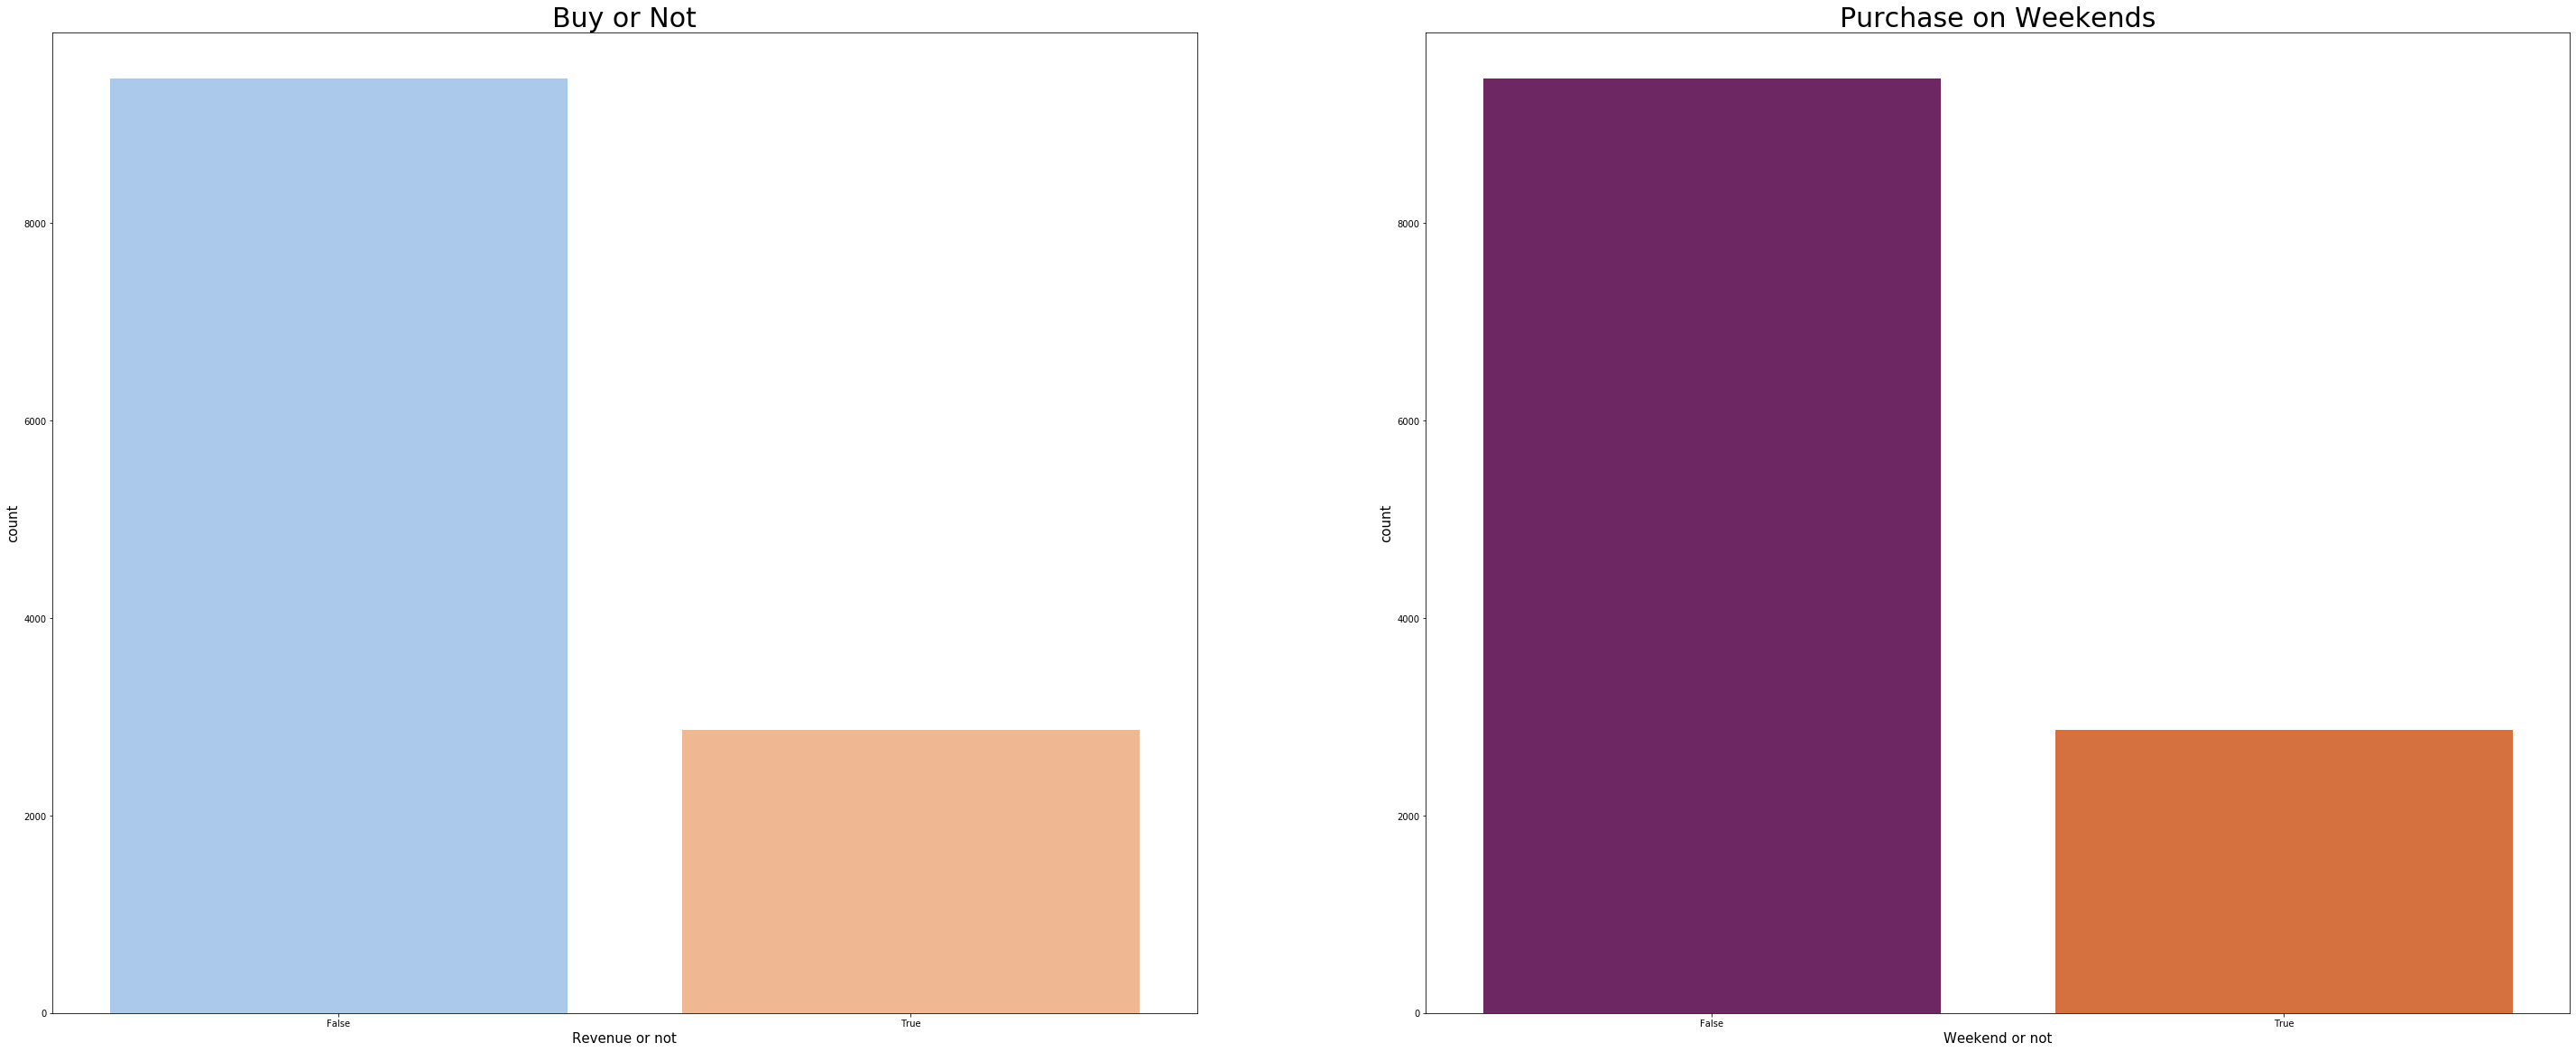

In [61]:
plt.rcParams['figure.figsize'] = (50, 20)

plt.subplot(1, 2, 1)
sns.countplot(data['Weekend'], palette = 'pastel')
plt.title('Buy or Not', fontsize = 30)
plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)


# checking the Distribution of customers on Weekend
plt.subplot(1, 2, 2)
sns.countplot(data['Weekend'], palette = 'inferno')
plt.title('Purchase on Weekends', fontsize = 30)
plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

## Filling Missing Values

In [62]:
data.fillna(0,inplace=True)

In [73]:
data.isnull().sum().sum()

0

In [75]:
data_to_be_imputed_category = pd.get_dummies(data_to_be_imputed)

In [76]:
X=data_to_be_imputed_category
X=X.drop('Revenue',axis=1)
Y=data_to_be_imputed.Revenue

In [82]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(X)
X = imputer.transform(X)

In [87]:
df = pd.DataFrame(Y)
df.isnull().sum().sum()

0

In [81]:
X.isnull().sum().sum()

AttributeError: 'numpy.ndarray' object has no attribute 'isnull'

In [79]:
x_train_imputed, x_test_imputed, y_train_imputed, y_test_imputed = train_test_split(X, Y, test_size=0.3, random_state=0)

In [80]:
clf=GaussianNB()

clf.fit(x_train_imputed,y_train_imputed)

pred=clf.predict(x_test_imputed)

accuracy=accuracy_score(y_test_imputed,pred)
print("accuracy is ",accuracy)

accuracy is  0.7904839145715058


## Taking care of Categorial Values

In [9]:
data1=pd.get_dummies(data)

data2=pd.get_dummies(data)

In [10]:
data1.Revenue

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
12300    False
12301    False
12302    False
12303    False
12304    False
12305    False
12306    False
12307    False
12308    False
12309    False
12310    False
12311     True
12312     True
12313     True
12314    False
12315    False
12316    False
12317    False
12318    False
12319    False
12320    False
12321    False
12322    False
12323    False
12324    False
12325    False
12326    False
12327    False
12328    False
12329    False
Name: Revenue, Length: 12330, dtype: bool

In [11]:
data1['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

## Encoding Label - Not required

#### The data has been hot-encoded already with get_dummies function

In [13]:
le= LabelEncoder()
data1['Revenue'] = le.fit_transform(data['Revenue'])
data1['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [14]:
x=data1
x=x.drop(['Revenue'],axis=1)
y=data1['Revenue']

(12330, 28)
(12330,)


## Splitting the dataset

In [15]:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8631, 28)
(8631,)
(3699, 28)
(3699,)


#### x_train, y_train haven't gone through any kind of sampling, or feature scaling or selection.
#### x_test, y_test is for testing and no changes will be done on those.

#### Same for data1 



# Naive Bayes on Not Sampled Set

In [16]:



clf=GaussianNB()

clf.fit(x_train,y_train)

pred=clf.predict(x_test)

accuracy=accuracy_score(y_test,pred)
print("accuracy is ",accuracy)


accuracy is  0.7904839145715058


In [17]:


X= pd.concat([x_train,y_train],axis=1)

revenue_not=X[X.Revenue==0]
revenue_yes=X[X.Revenue==1]

revenue_yes_upsampled = resample(revenue_yes,replace=True,n_samples=len(revenue_not),random_state=0)
upsampled=pd.concat([revenue_not,revenue_yes_upsampled])

upsampled.Revenue.value_counts()

1    7345
0    7345
Name: Revenue, dtype: int64

In [18]:
y_upsampled_train=upsampled.Revenue
x_upsampled_train=upsampled.drop('Revenue',axis=1)

In [19]:
clf=GaussianNB()

clf.fit(x_upsampled_train,y_upsampled_train)

pred=clf.predict(x_test)

accuracy=accuracy_score(y_test,pred)
print("accuracy is ",accuracy)

accuracy is  0.7299270072992701


In [32]:


sm = SMOTE(random_state=27, ratio=1.0)
x_train_sm, y_train_sm = sm.fit_sample(x_train, y_train)
x_train_sm.shape
y_train_sm.shape

(14690,)

In [33]:
clf=GaussianNB()

clf.fit(x_train_sm,y_train_sm)

pred=clf.predict(x_test)

accuracy=accuracy_score(y_test,pred)
print("accuracy is ",accuracy)

accuracy is  0.6809948634766153


In [22]:
X= pd.concat([x_train,y_train],axis=1)

revenue_not=X[X.Revenue==0]
revenue_yes=X[X.Revenue==1]

revenue_not_downsampled = resample(revenue_not,replace=True,n_samples=len(revenue_yes),random_state=0)
upsampled=pd.concat([revenue_not_downsampled,revenue_yes])

upsampled.Revenue.value_counts()

1    1286
0    1286
Name: Revenue, dtype: int64

In [23]:
y_downsampled_train=upsampled.Revenue
x_downsampled_train=upsampled.drop('Revenue',axis=1)

In [24]:
clf=GaussianNB()

clf.fit(x_downsampled_train,y_downsampled_train)

pred=clf.predict(x_test)

accuracy=accuracy_score(y_test,pred)
print("accuracy is ",accuracy)

accuracy is  0.7045147337118141


In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(data2)

le= LabelEncoder()
data2['Revenue'] = le.fit_transform(data['Revenue'])
data2['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [ ]:
x2=data2
x2=x2.drop(['Revenue'],axis=1)
y2=data2['Revenue']

print(x2.shape)
print(y2.shape)

In [ ]:
x2_train,x2_test,y2_train,y2_test = train_test_split(x,y,test_size=0.3,random_state=0)

print(x2_train.shape)
print(y2_train.shape)
print(x2_test.shape)
print(y2_test.shape)

In [1]:
clf=GaussianNB()

clf.fit(x2_train,y2_train)

pred=clf.predict(x2_test)

accuracy=accuracy_score(y2_test,pred)
print("accuracy is ",accuracy)

NameError: name 'GaussianNB' is not defined

In [ ]:
from sklearn import svm

clf=svm.SVC(kernel='linear')

clf.fit(x_train,y_train)

pred=clf.predict(x_test)

accuracy=accuracy_score(y_test,pred)
print("accuracy is ",accuracy)